<a href="https://colab.research.google.com/github/MeryemBelkhayat/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   
   Given medical patient [data](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction), we will predict which patients are most likely to suffer from a heart disease using the following machine learning models:
logistic regression, support vector machine and
 neural network.



# **Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report

# **Import Data**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction (1).csv


In [126]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

# **Data exploration**

The variables are:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect







In [127]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [129]:
data.shape

(270, 14)

In [130]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


> ### Data visualization

In [131]:
labels=["Heart Disease", "No Heart Disease"]
data1=data
pr=len(data1.loc[(data1['Heart Disease'] == 'Presence')].index)
abs=len(data1.loc[(data1['Heart Disease'] == 'Absence')].index)
values=[pr,abs]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, )])
colors = ['#513480', '#5e6dcc']
fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(colors=colors))
fig.update_layout(font_color="#d7dbf5",
                  paper_bgcolor="#020938",  
                  plot_bgcolor="#020938",title='Distrubution of heart disease')


fig.show()

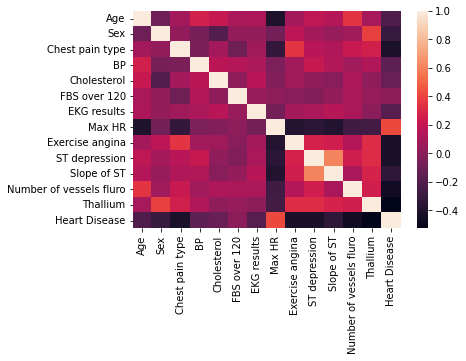

In [ ]:
sns.heatmap(data.corr())

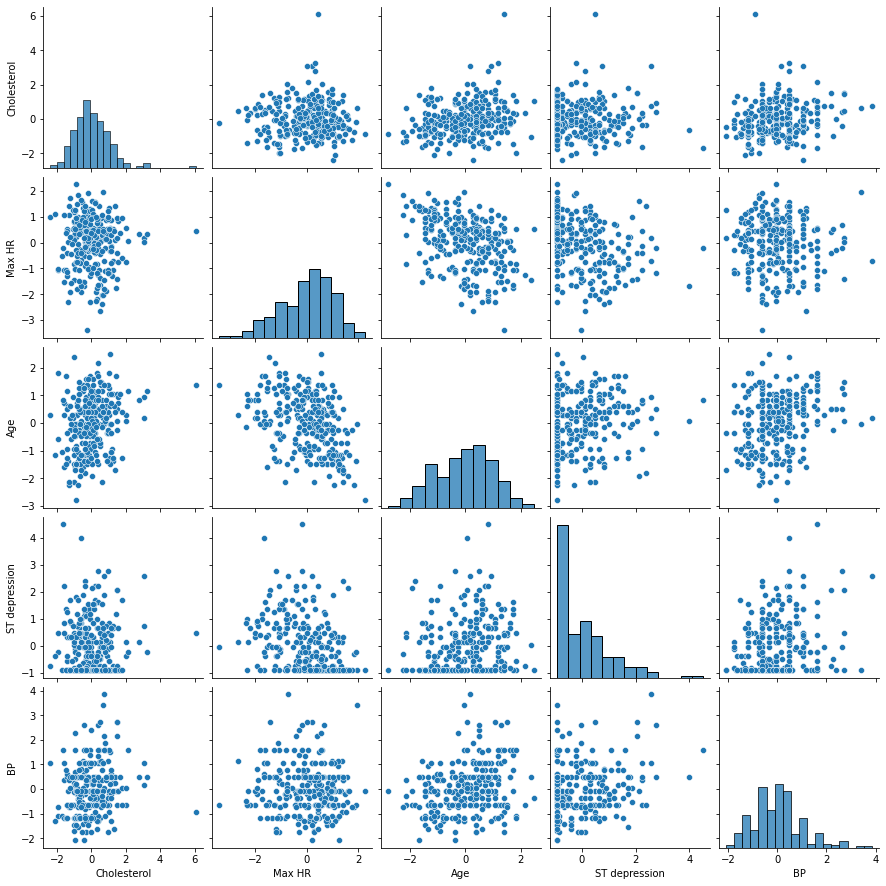

In [132]:
categorical_features=["Sex","Chest pain type","FBS over 120","EKG results","Exercise angina","Slope of ST","Number of vessels fluro","Thallium",'Heart Disease']
data[categorical_features]=data[categorical_features].astype("category")
continuous_features=set(data.columns)-set(categorical_features)
df_norm=data.copy()
scaler=StandardScaler()
df_norm[list(continuous_features)]=scaler.fit_transform(data[list(continuous_features)])
sns.pairplot(df_norm[continuous_features])

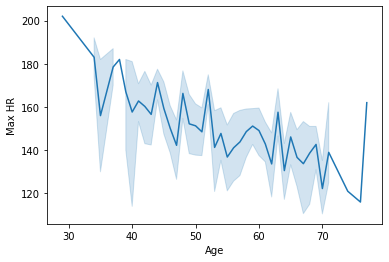

In [133]:
 sns.lineplot(x=data['Age'],y=data['Max HR'],data=data)

From the correlation matrix and the pair-element plotting in seaborn we can see that Age and Max HR are correlated. We will keep Max HR since it is more correlated to out target variable

# **data** **preprocessing**

In [134]:
data.drop(['Age'], axis='columns', inplace=True) 
data['Heart Disease'] = data['Heart Disease'].replace(["Presence"],0)
data['Heart Disease'] = data['Heart Disease'].replace(["Absence"],1)

In [135]:
def intoXandy(df, scaler):
    df = df.copy()
        
    # Split df into X and y
    y = df['Heart Disease'].copy()
    X = df.drop('Heart Disease', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [136]:
X, y = intoXandy(data, RobustScaler())
X

,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,0.0,1.0,0.00,1.149254,0.0,0.0,-1.348485,0.0,1.0000,0.0,3.0,0.00
1,-1.0,0.0,-0.75,4.761194,0.0,0.0,0.196970,0.0,0.5000,0.0,0.0,1.00
2,0.0,-1.0,-0.30,0.238806,0.0,-1.0,-0.378788,0.0,-0.3125,-1.0,0.0,1.00
3,0.0,1.0,-0.10,0.268657,0.0,-1.0,-1.469697,1.0,-0.3750,0.0,1.0,1.00
4,-1.0,-1.0,-0.50,0.358209,0.0,0.0,-0.984848,1.0,-0.3750,-1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,2.10,-0.686567,1.0,-1.0,0.257576,0.0,-0.1875,-1.0,0.0,1.00
266,0.0,-1.0,-0.50,0.268657,0.0,-1.0,0.590909,0.0,-0.5000,-1.0,0.0,1.00
267,-1.0,-1.0,0.50,0.731343,0.0,0.0,-0.015152,0.0,0.3125,0.0,0.0,0.00
268,0.0,1.0,0.50,-0.791045,0.0,-1.0,-0.166667,0.0,-0.2500,0.0,0.0,0.75


# **Training & Test**

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Logistic regression

In [138]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 77.78%


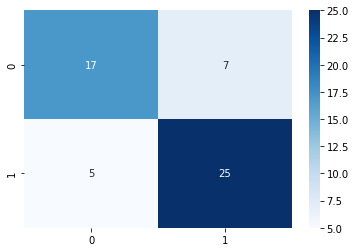

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.78      0.83      0.81        30

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



In [139]:
y_pred=lr_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,y_pred))

### SVM

In [140]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))

Support Vector Machine Accuracy: 74.07%


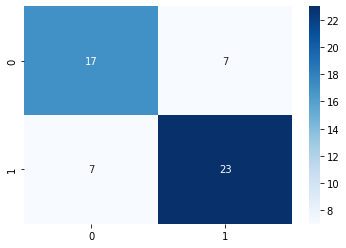

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.77      0.77      0.77        30

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



In [141]:
y_pred=svm_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,y_pred))

### Neural Network

In [146]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(X_test, y_test) * 100))

Neural Network Accuracy: 79.63%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



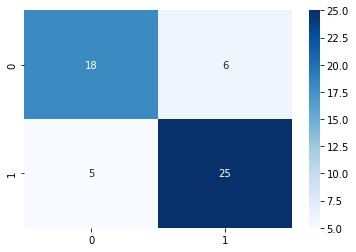

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.81      0.83      0.82        30

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



In [147]:
y_pred=nn_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,y_pred))

As we see, neural network model has the highest accuracy

# **Prediction**

In [ ]:
print('Enter New Patient')
x = input('Sex (0 for Female and 1 for Male)')
x1 = input('Chest pain type (From 1 to 4)')
x2= input('BP')
x3 = input('Cholesterol ( in mg/dl)')
x4 = input('FBS over 120 (0 if no andd 1 if yes)')
x5 = input('EKG results  (values 0,1,2)')
x6 = input('Max HR')
x7 = input('Exercise angina (0 if no andd 1 if yes)')
x8 = input('ST depression')
x9 = input('Slope of ST (1-3)')
x10 = input('Number of vessels fluro (0-3)')
x11 = input('Thallium (3-6-7)')
input_data = (x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
prediction = nn_model.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


Enter New Patient
